In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


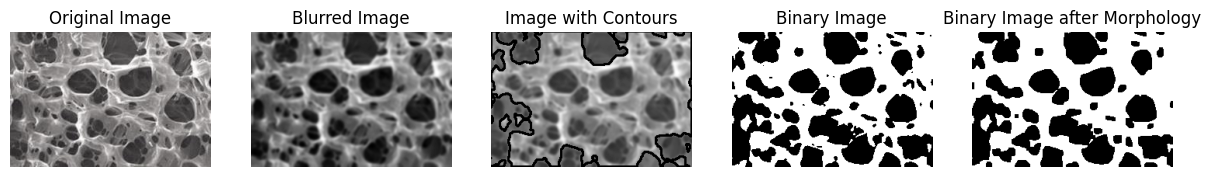

Porosity: 77.71%


In [17]:

def preprocess_image(image_path):
   
    original_image = cv2.imread(image_path)
    grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(grayscale_image, (7, 7), 0)

    # Perform adaptive thresholding
    _, binary_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return original_image, blurred_image, binary_image

def calculate_porosity(original_image, binary_image):
    # Apply morphological operations (dilation and erosion) to separate and enhance features
    kernel = np.ones((5, 5), np.uint8)
    binary_image_morph = cv2.dilate(binary_image, kernel, iterations=1)
    binary_image_morph = cv2.erode(binary_image_morph, kernel, iterations=1)

    # contours
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    drawn_image = np.copy(original_image)
    cv2.drawContours(drawn_image, contours, -1, (0, 255, 0), 2)

    # Calculate the total area and pore area
    total_area = binary_image.shape[0] * binary_image.shape[1]
    pore_area = sum(cv2.contourArea(contour) for contour in contours)

    # Calculate porosity as a percentage
    porosity_percentage = (pore_area / total_area) * 100

    return porosity_percentage, drawn_image, binary_image_morph

def display_images(images, titles):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))

    for i in range(len(images)):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(titles[i])
        axes[i].axis('off')

    plt.show()

def main():
    image_path = '1.jpg'

    original_image, blurred_image, binary_image = preprocess_image(image_path)

    porosity_percentage, drawn_image, binary_image_morph = calculate_porosity(blurred_image, binary_image)

    # Display 
    display_images([original_image, blurred_image, drawn_image, binary_image, binary_image_morph],
                   ['Original Image', 'Blurred Image', 'Image with Contours', 'Binary Image', 'Binary Image after Morphology'])

    # Display 
    print(f"Porosity: {porosity_percentage:.2f}%")

if __name__ == "__main__":
    main()


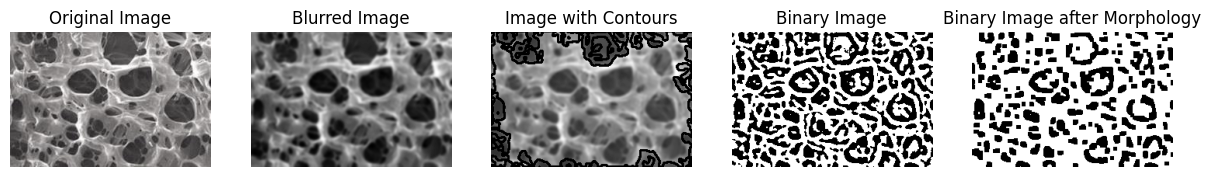

Porosity: 83.39%


In [21]:

def preprocess_image(image_path):

    original_image = cv2.imread(image_path)
    grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(grayscale_image, (7, 7), 0)

    # Perform adaptive thresholding
    binary_image = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    return original_image, blurred_image, binary_image

def calculate_porosity(original_image, binary_image):
    # Apply morphological operations (dilation and erosion) to separate and enhance features
    kernel = np.ones((5, 5), np.uint8)
    binary_image_morph = cv2.dilate(binary_image, kernel, iterations=1)
    binary_image_morph = cv2.erode(binary_image_morph, kernel, iterations=1)

    #contours
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    drawn_image = np.copy(original_image)
    cv2.drawContours(drawn_image, contours, -1, (0, 255, 0), 2)

    # Calculate the total area and pore area
    total_area = binary_image.shape[0] * binary_image.shape[1]
    pore_area = sum(cv2.contourArea(contour) for contour in contours)

    # Calculate porosity as a percentage
    porosity_percentage = (pore_area / total_area) * 100

    return porosity_percentage, drawn_image, binary_image_morph

def display_images(images, titles):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))

    for i in range(len(images)):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(titles[i])
        axes[i].axis('off')

    plt.show()

def main():
    image_path = '1.jpg'
    
    original_image, blurred_image, binary_image = preprocess_image(image_path)

    porosity_percentage, drawn_image, binary_image_morph = calculate_porosity(blurred_image, binary_image)

    # Display images
    display_images([original_image, blurred_image, drawn_image, binary_image, binary_image_morph],
                   ['Original Image', 'Blurred Image', 'Image with Contours', 'Binary Image', 'Binary Image after Morphology'])

    # Display results
    print(f"Porosity: {porosity_percentage:.2f}%")

if __name__ == "__main__":
    main()


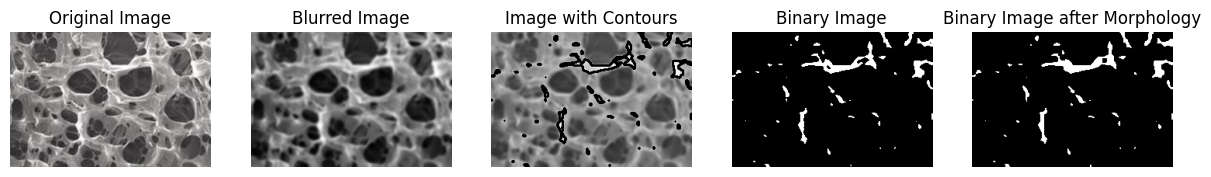

Porosity: 3.80%


In [22]:


def preprocess_image(image_path):

    original_image = cv2.imread(image_path)
    grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(grayscale_image, (7, 7), 0)

    # Perform adaptive thresholding
    _, binary_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_TRIANGLE)

    return original_image, blurred_image, binary_image

def calculate_porosity(original_image, binary_image):
    # Apply morphological operations (dilation and erosion) to separate and enhance features
    kernel = np.ones((5, 5), np.uint8)
    binary_image_morph = cv2.dilate(binary_image, kernel, iterations=1)
    binary_image_morph = cv2.erode(binary_image_morph, kernel, iterations=1)

    #contours
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    drawn_image = np.copy(original_image)
    cv2.drawContours(drawn_image, contours, -1, (0, 255, 0), 2)

    # Calculate the total area and pore area
    total_area = binary_image.shape[0] * binary_image.shape[1]
    pore_area = sum(cv2.contourArea(contour) for contour in contours)

    # Calculate porosity as a percentage
    porosity_percentage = (pore_area / total_area) * 100

    return porosity_percentage, drawn_image, binary_image_morph

def display_images(images, titles):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))

    for i in range(len(images)):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(titles[i])
        axes[i].axis('off')

    plt.show()

def main():
    image_path = '1.jpg'
    
    original_image, blurred_image, binary_image = preprocess_image(image_path)

    porosity_percentage, drawn_image, binary_image_morph = calculate_porosity(blurred_image, binary_image)

    # Display images
    display_images([original_image, blurred_image, drawn_image, binary_image, binary_image_morph],
                   ['Original Image', 'Blurred Image', 'Image with Contours', 'Binary Image', 'Binary Image after Morphology'])

    # Display results
    print(f"Porosity: {porosity_percentage:.2f}%")

if __name__ == "__main__":
    main()


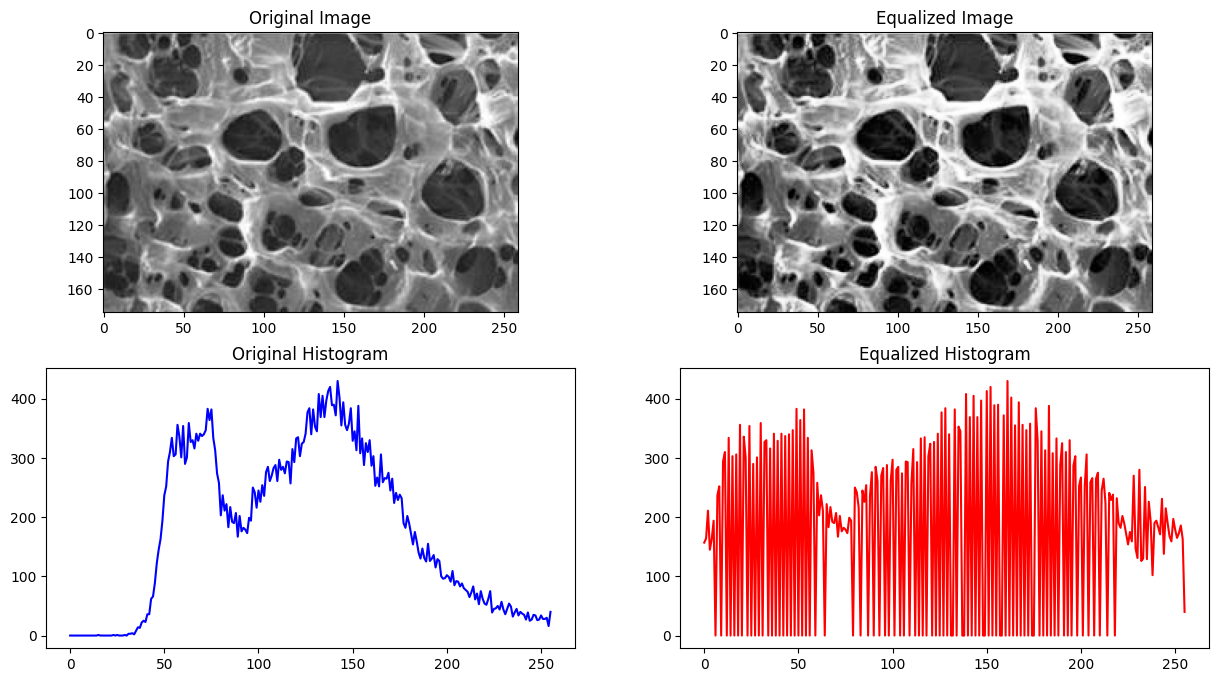

In [20]:
#code HW5
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_histogram(image):
    
    hist = np.zeros(256, dtype=int)
    
    # Calculate histogram
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel_value = int(image[i, j])
            hist[pixel_value] += 1
    
    return hist

def calculate_cdf(hist):
    # Calculate CDF
    cdf = np.zeros(256, dtype=int)
    cdf[0] = hist[0]
    
    for i in range(1, 256):
        cdf[i] = cdf[i-1] + hist[i]
    
    return cdf

def histogram_equalization(image):
    # Calculate histogram
    hist = calculate_histogram(image)

    # Calculate CDF
    cdf = calculate_cdf(hist)

    # Normalize CDF
    cdf_normalized = cdf * 255 / cdf.max()

    # Apply histogram equalization
    equalized_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel_value = int(image[i, j])
            equalized_image[i, j] = cdf_normalized[pixel_value]

    return equalized_image, hist, calculate_histogram(equalized_image)

# Read the image
image_path = "1.jpg"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image, original_hist, equalized_hist = histogram_equalization(original_image)

# Display original and equalized images along with histograms
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1), plt.imshow(original_image, cmap='gray'), plt.title('Original Image')
plt.subplot(2, 2, 2), plt.imshow(equalized_image, cmap='gray'), plt.title('Equalized Image')

plt.subplot(2, 2, 3), plt.plot(original_hist, color='blue'), plt.title('Original Histogram')
plt.subplot(2, 2, 4), plt.plot(equalized_hist, color='red'), plt.title('Equalized Histogram')

plt.show()


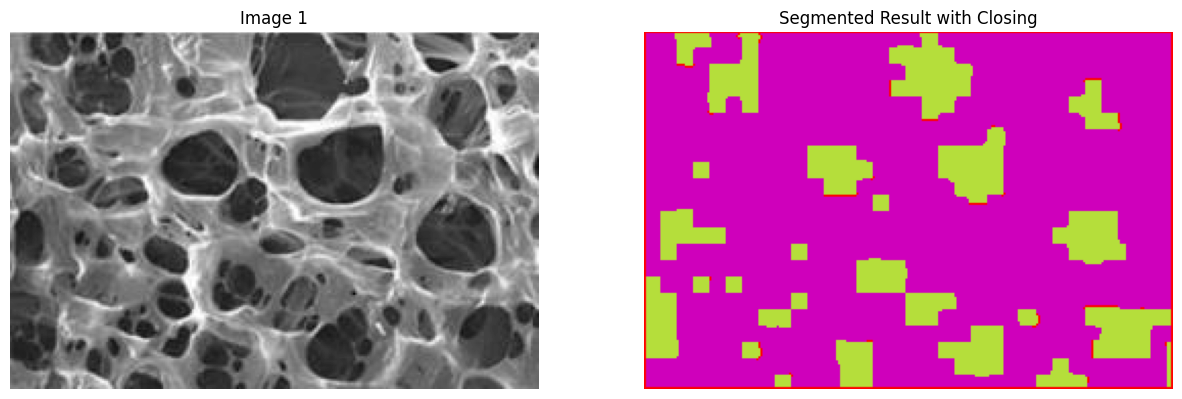

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image1 = cv2.imread('1.jpg')
image2 = cv2.imread('2.jpg')

#  grayscale 
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# morphological operations
kernel_size = 5  
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# Closing Result 
closing_result = cv2.morphologyEx(gray_image2, cv2.MORPH_CLOSE, kernel)

# Watershed Algorithm on Closing Result
_, markers = cv2.connectedComponents(closing_result)
markers = markers + 1
markers[closing_result == 255] = 0
cv2.watershed(image2, markers)

segmented_image = np.zeros_like(image2)
for label in np.unique(markers):
    if label == -1:  # Watershed boundaries
        color = [0, 0, 255]  # Red color for boundaries
    else:
        color = np.random.randint(0, 255, size=(3,))
    
    mask = np.zeros_like(gray_image2, dtype=np.uint8)
    mask[markers == label] = 255
    segmented_image[mask != 0] = color

#  subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Image 1
axes[0].imshow(gray_image1, cmap='gray')
axes[0].set_title('Image 1')
axes[0].axis('off')

# Segmented Result for Image 2 using Closing Operation
axes[1].imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Segmented Result with Closing')
axes[1].axis('off')

plt.show()
